<a href="https://colab.research.google.com/github/Okeezodumu/Natural-language-processing/blob/main/TextClassification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing Email Analysis and PredictionProject Description:
A marketing company wants to make an internal spam email detection so that before sending any email they can findout if the email will be considered as spam or not.
They need to find the words which are the cause for detecting an email as spam. And which words can be useful to be identified as ham (not spam) emails only.
Problem Statement:
Detect Spam Emails (create a text classification model that detects spam email) include the inference function and test it out.
Make a worcloud for spam emails and ham emails (safe) and see if any words stand out in either category
Give the stake holders a list of terms that they can avoid adding to their emails to prevent their marketing emails going into the spam box of their customers

In [ ]:
!pip install wordcloud # We need word cloud to visualize text

In [ ]:
import numpy as np  # This line imports the NumPy library and renames it as 'np' for easier reference later in the code
import pandas as pd # This line imports the Pandas library and renames it as 'pd' for easier reference later in the code
import matplotlib.pyplot as plt
# This line imports the Pyplot module from the Matplotlib library and renames it as 'plt' for easier reference later in the code

import seaborn as sns  # This line imports the Seaborn library and renames it as 'sns' for easier reference later in the code
%matplotlib inline
# This line enables Matplotlib to display plots inline within the Jupyter Notebook
from matplotlib import style
# This line imports the 'style' module from the Matplotlib library
style.use('ggplot')
# This line sets the plotting style to 'ggplot', which emulates the aesthetics of the ggplot2 package in R

In [ ]:
data=pd.read_csv('/content/emails.csv')
data.head()
#data.shape

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data.drop_duplicates(subset='text', inplace=True)
print(data.shape)

(4, 3002)


In [ ]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,Email 84,12,15,1,12,7,1,231,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
391,Email 392,8,14,3,7,4,6,291,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,1.0


In [ ]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

Accuracy: 0.9748711340206185
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.96      0.95      0.96       455

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



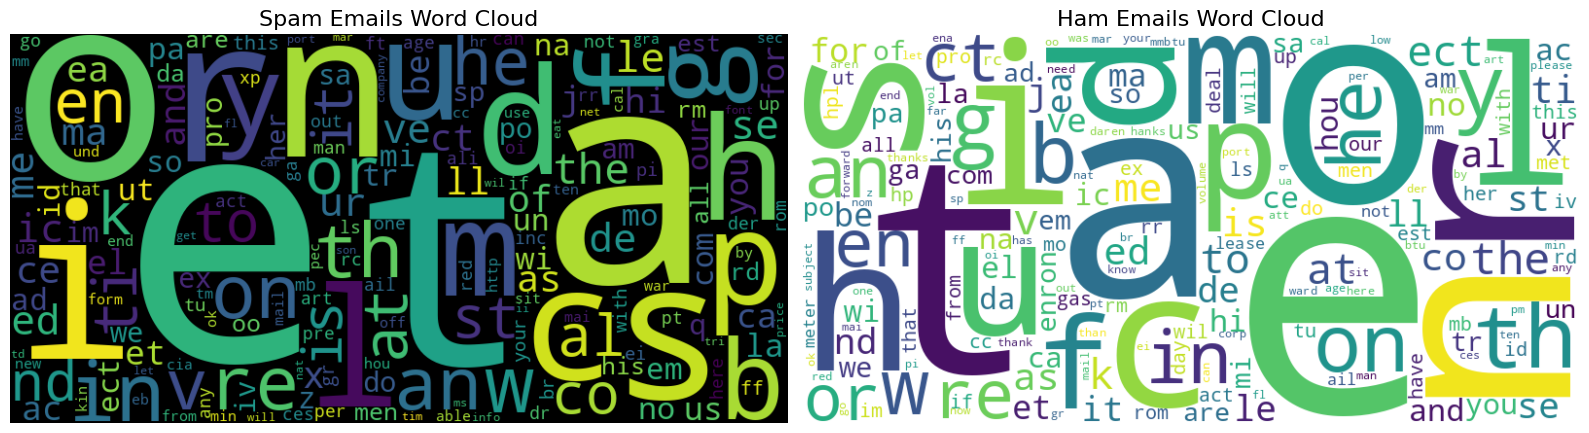

Top 20 Spam Indicative Words: ['e', 't', 'a', 'o', 'i', 'n', 'r', 's', 'l', 'c', 'd', 'h', 'u', 'm', 'p', 'f', 'g', 'y', 'b', 'in']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
# Load the dataset
file_path = "emails.csv"  # Replace with your file path
emails_df = pd.read_csv(file_path)

In [ ]:
# Separate features and target
X = emails_df.iloc[:, 1:-1]  # Exclude "Email No." and "Prediction"
y = emails_df['Prediction']


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9748711340206185
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.96      0.95      0.96       455

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



In [ ]:

# Generate word frequencies
spam_word_freq = X.loc[y == 1].sum()
ham_word_freq = X.loc[y == 0].sum()


In [ ]:
# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(spam_word_freq)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_freq)

In [ ]:
# Plot the word clouds
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

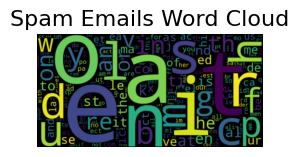

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Emails Word Cloud', fontsize=16)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

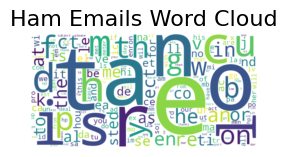

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Emails Word Cloud', fontsize=16)
plt.axis('off')

In [ ]:
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# List of words indicative of spam
spam_keywords = spam_word_freq.nlargest(20).index.tolist()
print("Top 20 Spam Indicative Words:", spam_keywords)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Top 20 Spam Indicative Words: ['e', 't', 'a', 'o', 'i', 'n', 'r', 's', 'l', 'c', 'd', 'h', 'u', 'm', 'p', 'f', 'g', 'y', 'b', 'in']


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)


In [ ]:
# Train a LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000) # Remove n_estimators and keep max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9710051546391752
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.94      0.96      0.95       455

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



In [ ]:
# Generate word frequencies
spam_word_freq = X.loc[y == 1].sum()
ham_word_freq = X.loc[y == 0].sum()

In [ ]:
# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(spam_word_freq)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_freq)

In [ ]:
# Plot the word clouds
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

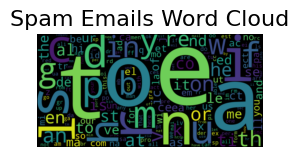

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Emails Word Cloud', fontsize=16)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

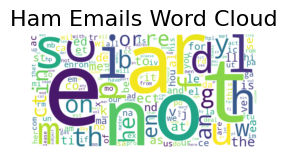

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Emails Word Cloud', fontsize=16)
plt.axis('off')

In [ ]:
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# List of words indicative of spam
spam_keywords = spam_word_freq.nlargest(20).index.tolist()
print("Top 20 Spam Indicative Words:", spam_keywords)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Top 20 Spam Indicative Words: ['e', 't', 'a', 'o', 'i', 'n', 'r', 's', 'l', 'c', 'd', 'h', 'u', 'm', 'p', 'f', 'g', 'y', 'b', 'in']
